**LSTM**

Epoch 1/40


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1362/1362 [==============================] - 19s 10ms/step - loss: 0.0037 - accuracy: 1.8359e-04 - val_loss: 0.0032 - val_accuracy: 0.0000e+00
Epoch 2/40
1362/1362 [==============================] - 14s 10ms/step - loss: 0.0028 - accuracy: 1.8359e-04 - val_loss: 0.0029 - val_accuracy: 0.0000e+00
Epoch 3/40
1362/1362 [==============================] - 11s 8ms/step - loss: 0.0024 - accuracy: 1.8359e-04 - val_loss: 0.0023 - val_accuracy: 0.0000e+00
Epoch 4/40
1362/1362 [==============================] - 9s 7ms/step - loss: 0.0017 - accuracy: 1.8359e-04 - val_loss: 0.0017 - val_accuracy: 0.0000e+00
Epoch 5/40
1362/1362 [==============================] - 12s 9ms/step - loss: 0.0013 - accuracy: 3.6717e-04 - val_loss: 0.0014 - val_accuracy: 0.0000e+00
Epoch 6/40
1362/1362 [==============================] - 13s 10ms/step - loss: 0.0011 - accuracy: 3.6717e-04 - val_loss: 0.0013 - val_accuracy: 0.0000e+00
Epoch 7/40
1362/1362 [==============================] - 13s 9ms/step - loss: 0.0011 - accur

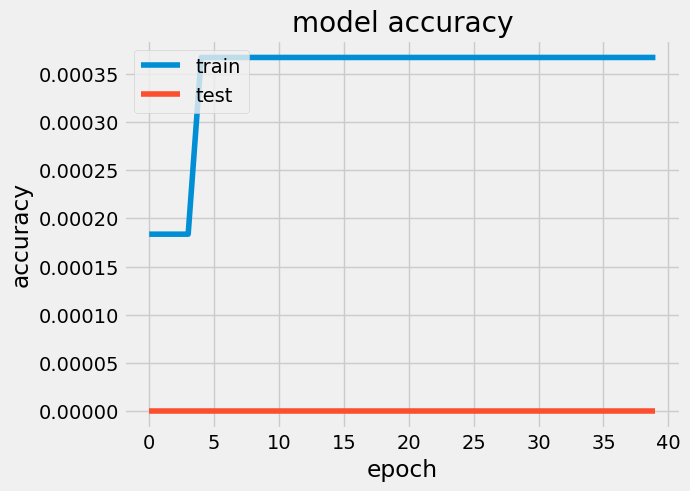

In [4]:
#import the libraries
import math
import numpy as np
import pandas as pd
import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.layers import Dropout
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

dataset=pd.read_csv("updated_leeds_center_air_quality_2022.csv",header=0)
#print(dataset.had())
dataset_x = dataset[['CO','PM10','NO','NO2']].values
#dataset_x = dataset.drop(['Date','Time','PM2.5'],axis=1)
dataset_y = dataset[['PM2.5']].values

#Split the Dataset into  training and testing sets (80%:20%)
x_train,x_test,y_train,y_test=train_test_split(dataset_x,dataset_y,test_size=0.2,random_state=42)

#scale the all of the data to be values between 0 and 1
x_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()
scaled_xtrain = x_scaler.fit_transform(x_train)
scaled_ytrain = y_scaler.fit_transform(y_train)
scaled_xtest = x_scaler.fit_transform(x_test)

#convert to numpy arrays
scaled_xtrain,scaled_ytrain=np.array(scaled_xtrain),np.array(scaled_ytrain)

#Reshape the data into 3-D array
scaled_x =np.reshape(scaled_xtrain,(scaled_xtrain.shape[0],scaled_xtrain.shape[1],1))
scaled_y =np.reshape(scaled_ytrain,(scaled_ytrain.shape[0],scaled_ytrain.shape[1],1))

model_lstm =Sequential()
model_lstm.add(LSTM(units=100,return_sequences=False,input_shape=(scaled_x.shape[1],1)))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(units=1))

#Compile and fit the model on 40 epochs
optimizer =keras.optimizers.Adam(lr=0.0001)
model_lstm.compile(optimizer=optimizer,loss='mean_squared_error',metrics=['accuracy'])
lstm_history=model_lstm.fit(scaled_x,scaled_y,epochs=40,batch_size=4,shuffle=True,validation_split=0.20)

#Convert x_test toa numpy array
x_test = np.array(scaled_xtest)

#reshape the data into 3D array
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

#check predicted values
predictions = model_lstm.predict(x_test)
x_pred = model_lstm.predict(scaled_x)
#undo scaling
predictions=y_scaler.inverse_transform(predictions)
x_pred = y_scaler.inverse_transform(x_pred)
#print(predictions.shape)
#Calculate RMSE score
rmse_test = np.sqrt(np.mean(((predictions-y_test)**2)))
rmse_train = np.sqrt(np.mean(((x_pred-y_train)**2)))
print("training rmse: ",rmse_train)
print("testing rmse: ",rmse_test)

#list all data in history
print(lstm_history.history.keys())
print("\n")
#Summarize history for accuracy
plt.plot(lstm_history.history['accuracy'])
plt.plot(lstm_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()


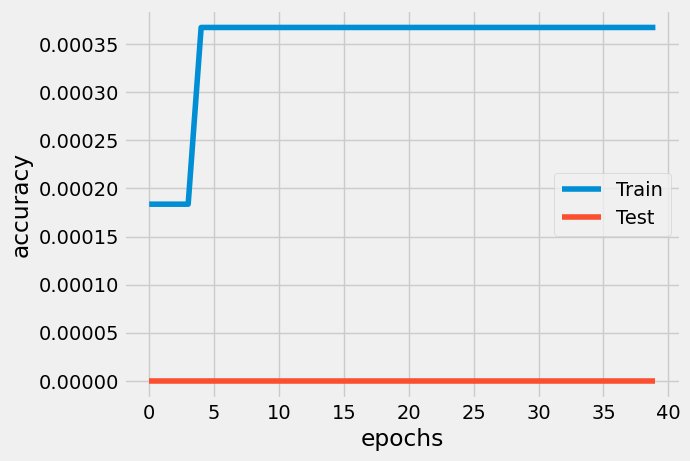

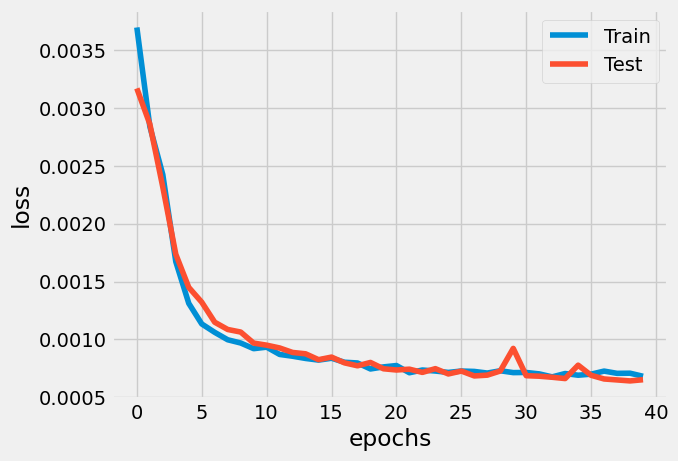

In [14]:
 #visualize the results
import matplotlib.pyplot as plt
plt.plot(lstm_history.history['accuracy'])
plt.plot(lstm_history.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['Train', 'Test'])
plt.show()

plt.plot(lstm_history.history['loss'])
plt.plot(lstm_history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['Train', 'Test'])
plt.show()

**GRU**

C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/40
1362/1362 [==============================] - 34s 16ms/step - loss: 0.0035 - accuracy: 1.8359e-04 - val_loss: 0.0030 - val_accuracy: 0.0000e+00
Epoch 2/40
1362/1362 [==============================] - 18s 13ms/step - loss: 0.0026 - accuracy: 1.8359e-04 - val_loss: 0.0026 - val_accuracy: 0.0000e+00
Epoch 3/40
1362/1362 [==============================] - 14s 10ms/step - loss: 0.0019 - accuracy: 1.8359e-04 - val_loss: 0.0020 - val_accuracy: 0.0000e+00
Epoch 4/40
1362/1362 [==============================] - 13s 10ms/step - loss: 0.0014 - accuracy: 3.6717e-04 - val_loss: 0.0016 - val_accuracy: 0.0000e+00
Epoch 5/40
1362/1362 [==============================] - 13s 10ms/step - loss: 0.0012 - accuracy: 3.6717e-04 - val_loss: 0.0013 - val_accuracy: 0.0000e+00
Epoch 6/40
1362/1362 [==============================] - 15s 11ms/step - loss: 0.0011 - accuracy: 3.6717e-04 - val_loss: 0.0011 - val_accuracy: 0.0000e+00
Epoch 7/40
1362/1362 [==============================] - 15s 11ms/step - loss

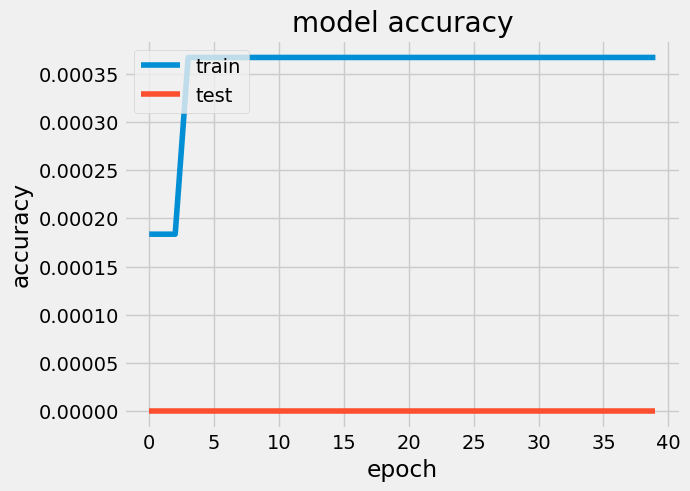

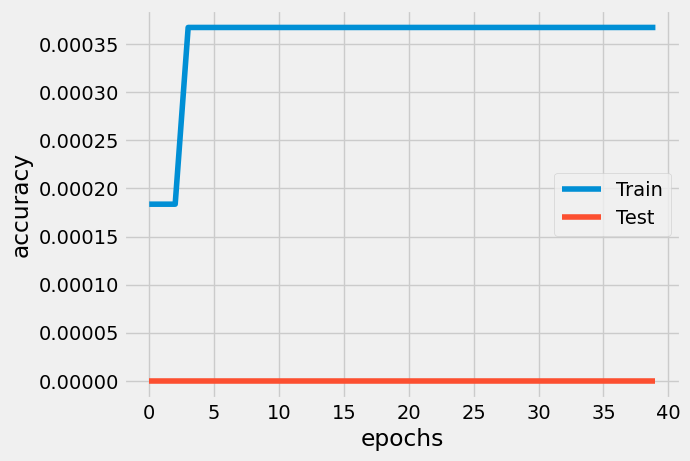

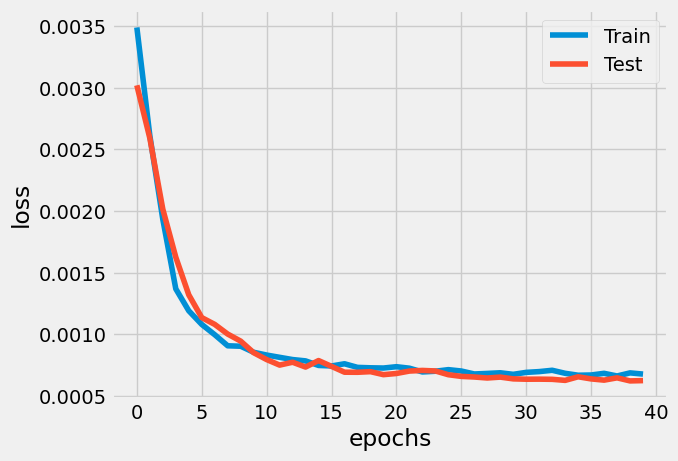

In [19]:
import pandas as pd
import numpy as np
import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import GRU


dataset=pd.read_csv("updated_leeds_center_air_quality_2022.csv",header=0)
#print(dataset.had())
dataset_x = dataset[['CO','PM10','NO','NO2']].values
#dataset_x = dataset.drop(['Date','Time','PM2.5'],axis=1)
dataset_y = dataset[['PM2.5']].values

#Split the Dataset into  training and testing sets (80%:20%)
x_train,x_test,y_train,y_test=train_test_split(dataset_x,dataset_y,test_size=0.2,random_state=42)

#scale the all of the data to be values between 0 and 1
x_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()
scaled_xtrain = x_scaler.fit_transform(x_train)
scaled_ytrain = y_scaler.fit_transform(y_train)
scaled_xtest = x_scaler.fit_transform(x_test)

#convert to numpy arrays
scaled_xtrain,scaled_ytrain=np.array(scaled_xtrain),np.array(scaled_ytrain)

#Reshape the data into 3-D array
scaled_x =np.reshape(scaled_xtrain,(scaled_xtrain.shape[0],scaled_xtrain.shape[1],1))
scaled_y =np.reshape(scaled_ytrain,(scaled_ytrain.shape[0],scaled_ytrain.shape[1],1))

model_gru=Sequential()
model_gru.add(GRU(100,return_sequences=False,input_shape=(scaled_x.shape[1],1   )))
model_gru.add(Dropout(0.2))
model_gru.add(Dense(units=1))
#compile and fit the model
optimizer= keras.optimizers.Adam(lr=0.0001)
model_gru.compile(optimizer=optimizer,loss='mean_squared_error',metrics=['accuracy'])
gru_history= model_gru.fit(scaled_x,scaled_y,epochs=40,batch_size=4,shuffle=True,validation_split=0.2)

#Convert x_test toa numpy array
x_test = np.array(scaled_xtest)

#reshape the data into 3D array
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

#check predicted values
predictions = model_gru.predict(x_test)
x_pred = model_gru.predict(scaled_x)
#undo scaling
predictions = y_scaler.inverse_transform(predictions)
x_pred = y_scaler.inverse_transform(x_pred)
#print(predictions.shape)
#Calculate RMSE score
rmse_test = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse_train = np.sqrt(np.mean(((x_pred - y_train) ** 2)))
print("training rmse: ", rmse_train)
print("testing rmse: ", rmse_test)

#list all data in history
print(gru_history.history.keys())
print("\n")
#Summarize history for accuracy
plt.plot(gru_history.history['accuracy'])
plt.plot(gru_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#visualize the results
import matplotlib.pyplot as plt

plt.plot(gru_history.history['accuracy'])
plt.plot(gru_history.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['Train', 'Test'])
plt.show()

plt.plot(gru_history.history['loss'])
plt.plot(gru_history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['Train', 'Test'])
plt.show()

**1-D CNN epoch40**

Epoch 1/40
171/171 [==============================] - 4s 9ms/step - loss: 19.1157 - accuracy: 0.0000e+00 - val_loss: 12.0851 - val_accuracy: 0.0000e+00
Epoch 2/40
171/171 [==============================] - 1s 7ms/step - loss: 11.1242 - accuracy: 0.0000e+00 - val_loss: 12.0378 - val_accuracy: 0.0000e+00
Epoch 3/40
171/171 [==============================] - 1s 7ms/step - loss: 10.7577 - accuracy: 0.0000e+00 - val_loss: 9.6467 - val_accuracy: 0.0000e+00
Epoch 4/40
171/171 [==============================] - 1s 6ms/step - loss: 10.6479 - accuracy: 0.0000e+00 - val_loss: 9.7745 - val_accuracy: 0.0000e+00
Epoch 5/40
171/171 [==============================] - 1s 6ms/step - loss: 10.6805 - accuracy: 0.0000e+00 - val_loss: 10.2355 - val_accuracy: 0.0000e+00
Epoch 6/40
171/171 [==============================] - 1s 6ms/step - loss: 10.3182 - accuracy: 0.0000e+00 - val_loss: 9.2881 - val_accuracy: 0.0000e+00
Epoch 7/40
171/171 [==============================] - 1s 5ms/step - loss: 10.2583 - accurac

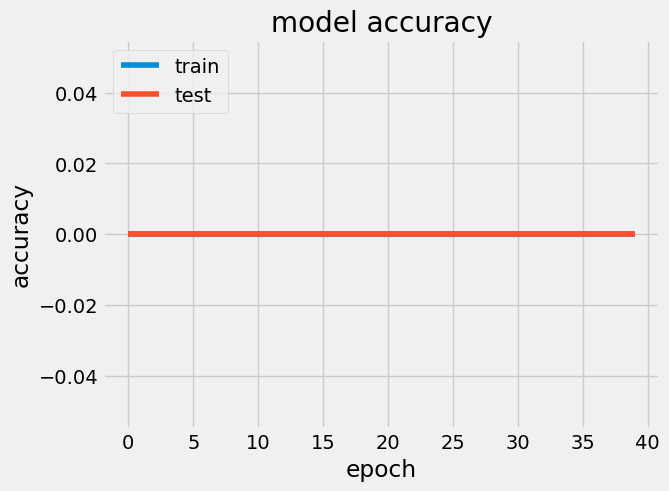

In [16]:
#import the libraries 1D-CNN
import math
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

dataset=pd.read_csv("updated_leeds_center_air_quality_2022.csv",header=0)
dataset_x = dataset[['CO','PM10','NO','NO2']].values
dataset_y = dataset[['PM2.5']].values

#Split the Dataset into  training and testing sets (80%:20%)
x_train,x_test,y_train,y_test=train_test_split(dataset_x,dataset_y,test_size=0.2)

#convert to numpy arrays
xtrain,ytrain=np.array(x_train),np.array(y_train)

#Reshape the data into 3-D array
scaled_x =np.reshape(xtrain,(xtrain.shape[0],xtrain.shape[1],1))
scaled_y =np.reshape(ytrain,(ytrain.shape[0],ytrain.shape[1],1))
#define model
model_cnn =Sequential()
model_cnn.add(Conv1D(filters=64,kernel_size=2,activation='relu',input_shape=(scaled_x.shape[1],1)))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Flatten())
model_cnn.add(Dense(100, activation='relu'))
model_cnn.add(Dense(1))
model_cnn.compile(optimizer='adam',loss='mse',metrics=['accuracy'])


#fit the model on 40 epochs

cnn_history=model_cnn.fit(scaled_x,scaled_y,epochs=40,verbose=1,validation_split=0.20)

#Convert x_test to a numpy array
x_test = np.array(x_test)

#reshape the data into 3D array
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

#check predicted values
predictions = model_cnn.predict(x_test,verbose=0)
x_pred = model_cnn.predict(scaled_x,verbose=0)
#print(predictions.shape)
#Calculate RMSE score
rmse_test = np.sqrt(np.mean(((predictions-y_test)**2)))
rmse_train = np.sqrt(np.mean(((x_pred-y_train)**2)))
print("training rmse: ",rmse_train)
print("testing rmse: ",rmse_test)

#list all data in history
print(cnn_history.history.keys())
print("\n")
#Summarize history for accuracy
plt.plot(cnn_history.history['accuracy'])
plt.plot(cnn_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()


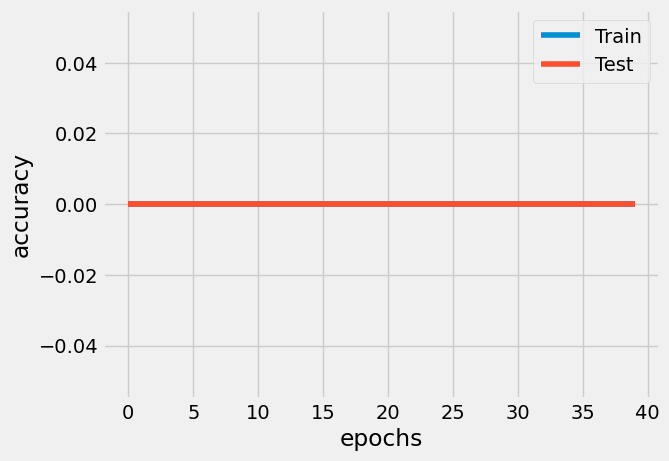

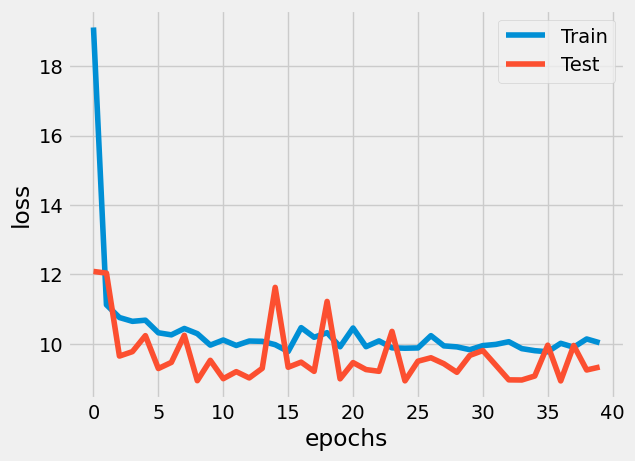

In [17]:
 #visualize the results
import matplotlib.pyplot as plt
plt.plot(cnn_history.history['accuracy'])
plt.plot(cnn_history.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['Train', 'Test'])
plt.show()

plt.plot(cnn_history.history['loss'])
plt.plot(cnn_history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['Train', 'Test'])
plt.show()

**1-D CNN epoch1000**

Epoch 1/1000
171/171 [==============================] - 4s 11ms/step - loss: 22.4170 - accuracy: 0.0000e+00 - val_loss: 12.7478 - val_accuracy: 0.0000e+00
Epoch 2/1000
171/171 [==============================] - 1s 6ms/step - loss: 12.0177 - accuracy: 0.0000e+00 - val_loss: 12.8382 - val_accuracy: 0.0000e+00
Epoch 3/1000
171/171 [==============================] - 1s 7ms/step - loss: 11.2236 - accuracy: 0.0000e+00 - val_loss: 11.3902 - val_accuracy: 0.0000e+00
Epoch 4/1000
171/171 [==============================] - 1s 7ms/step - loss: 11.2701 - accuracy: 0.0000e+00 - val_loss: 12.5246 - val_accuracy: 0.0000e+00
Epoch 5/1000
171/171 [==============================] - 1s 6ms/step - loss: 11.0879 - accuracy: 0.0000e+00 - val_loss: 11.4979 - val_accuracy: 0.0000e+00
Epoch 6/1000
171/171 [==============================] - 1s 6ms/step - loss: 10.8743 - accuracy: 0.0000e+00 - val_loss: 11.9857 - val_accuracy: 0.0000e+00
Epoch 7/1000
171/171 [==============================] - 1s 5ms/step - loss:

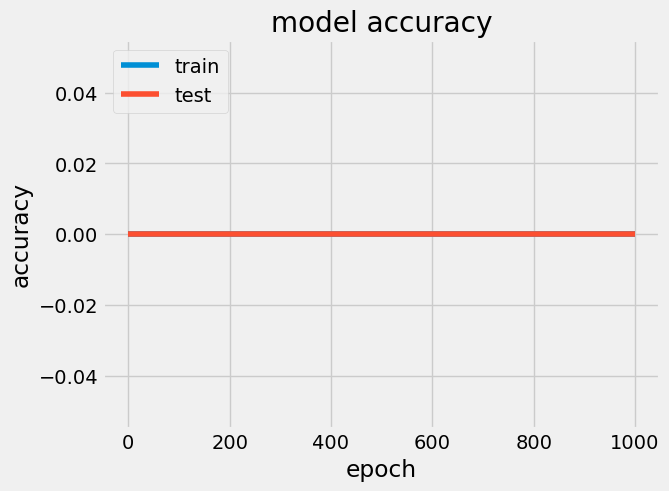

In [20]:
#import the libraries 1D-CNN
import math
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

dataset=pd.read_csv("updated_leeds_center_air_quality_2022.csv",header=0)
dataset_x = dataset[['CO','PM10','NO','NO2']].values
dataset_y = dataset[['PM2.5']].values

#Split the Dataset into  training and testing sets (80%:20%)
x_train,x_test,y_train,y_test=train_test_split(dataset_x,dataset_y,test_size=0.2)

#convert to numpy arrays
xtrain,ytrain=np.array(x_train),np.array(y_train)

#Reshape the data into 3-D array
scaled_x =np.reshape(xtrain,(xtrain.shape[0],xtrain.shape[1],1))
scaled_y =np.reshape(ytrain,(ytrain.shape[0],ytrain.shape[1],1))
#define model
model_cnn =Sequential()
model_cnn.add(Conv1D(filters=64,kernel_size=2,activation='relu',input_shape=(scaled_x.shape[1],1)))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Flatten())
model_cnn.add(Dense(100, activation='relu'))
model_cnn.add(Dense(1))
model_cnn.compile(optimizer='adam',loss='mse',metrics=['accuracy'])


#fit the model on 1000 epochs

cnn_history=model_cnn.fit(scaled_x,scaled_y,epochs=1000,verbose=1,validation_split=0.20)

#Convert x_test to a numpy array
x_test = np.array(x_test)

#reshape the data into 3D array
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

#check predicted values
predictions = model_cnn.predict(x_test,verbose=0)
x_pred = model_cnn.predict(scaled_x,verbose=0)
#print(predictions.shape)
#Calculate RMSE score
rmse_test = np.sqrt(np.mean(((predictions-y_test)**2)))
rmse_train = np.sqrt(np.mean(((x_pred-y_train)**2)))
print("training rmse: ",rmse_train)
print("testing rmse: ",rmse_test)

#list all data in history
print(cnn_history.history.keys())
print("\n")
#Summarize history for accuracy
plt.plot(cnn_history.history['accuracy'])
plt.plot(cnn_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()


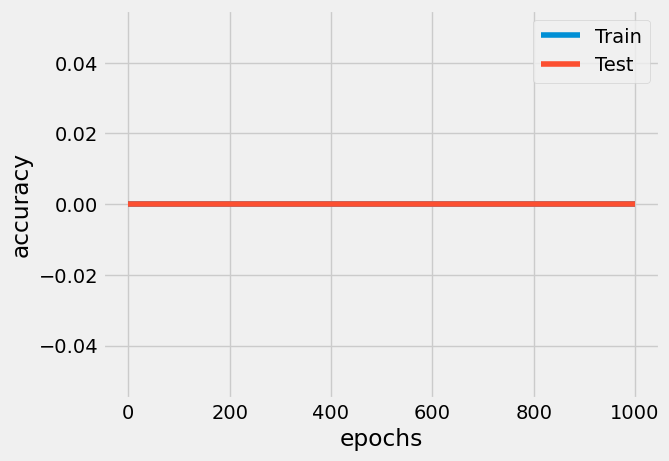

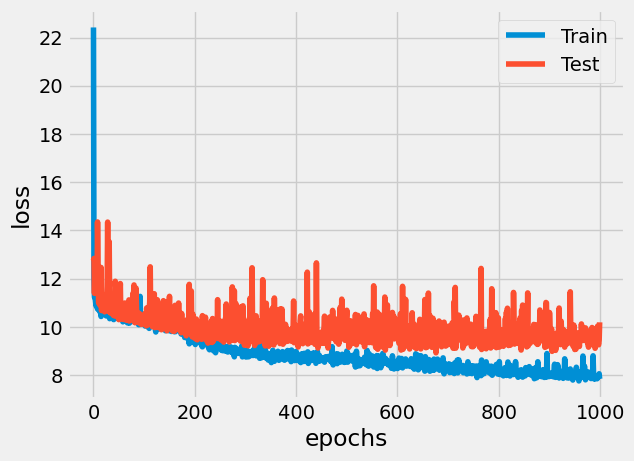

In [21]:
 #visualize the results
import matplotlib.pyplot as plt
plt.plot(cnn_history.history['accuracy'])
plt.plot(cnn_history.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['Train', 'Test'])
plt.show()

plt.plot(cnn_history.history['loss'])
plt.plot(cnn_history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['Train', 'Test'])
plt.show()